In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 
os.chdir(r'E:\AI-ML PYTHON\job datasets\interns_task-main')

In [3]:
os.getcwd()

'E:\\AI-ML PYTHON\\job datasets\\interns_task-main'

## Importing packages

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 

In [5]:
data = pd.read_csv('sampled_data2.csv', encoding='unicode_escape')
data.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,2021-07-16,C1326593353,36to45,Male,M1823072687,Transportation,15.78,0
1,2021-08-22,C483912131,26to35,Female,M1198415165,Beauty&Wellness,608.32,1
2,2021-06-03,C1681589600,26to35,Female,M348934600,Transportation,43.76,0
3,2021-07-01,C1251749294,36to45,Female,M1823072687,Transportation,41.57,0
4,2021-03-06,C1705346216,36to45,Male,M348934600,Transportation,42.97,0


In [6]:
data.tail()

,step,customer,age,gender,merchant,category,amount,fraud
25195,2021-08-22,C1480193980,46to55,Female,M1823072687,Transportation,32.07,0
25196,2021-08-14,C207380283,36to45,Female,M480139044,Health,373.27,1
25197,2021-07-18,C183270065,lt18,Female,M1823072687,Transportation,2.50,0
25198,2021-07-23,C149698808,26to35,Female,M1823072687,Transportation,5.38,0
25199,2021-07-16,C684162308,56to65,Female,M840466850,Technology,93.89,1


## data insights

In [7]:
data.columns

Index(['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount',
       'fraud'],
      dtype='object')

In [8]:
data.dtypes

step         object
customer     object
age          object
gender       object
merchant     object
category     object
amount      float64
fraud         int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   step      25200 non-null  object 
 1   customer  25200 non-null  object 
 2   age       25200 non-null  object 
 3   gender    25200 non-null  object 
 4   merchant  25200 non-null  object 
 5   category  25200 non-null  object 
 6   amount    25200 non-null  float64
 7   fraud     25200 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.5+ MB


In [10]:
data.describe()

,amount,fraud
count,25200.000000,25200.000000
mean,174.212506,0.285714
std,501.116240,0.451763
min,0.000000,0.000000
25%,17.720000,0.000000
50%,36.340000,0.000000
75%,109.180000,1.000000
max,8329.960000,1.000000


In [11]:
data.shape 

(25200, 8)

In [12]:
data['fraud'].value_counts()

0    18000
1     7200
Name: fraud, dtype: int64

In [13]:
data['amount'].nunique()

12958

In [14]:
data['fraud'].unique()

array([0, 1], dtype=int64)

## Missing values 

In [15]:
data.isna().sum()

step        0
customer    0
age         0
gender      0
merchant    0
category    0
amount      0
fraud       0
dtype: int64

In [16]:
data.notna().sum()

step        25200
customer    25200
age         25200
gender      25200
merchant    25200
category    25200
amount      25200
fraud       25200
dtype: int64

    - There are no any Null values present in this data

## Correlation between the features

In [17]:
data.corr()

,amount,fraud
amount,1.000000,0.450215
fraud,0.450215,1.000000


<AxesSubplot:>

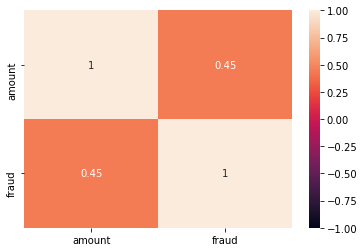

In [18]:
sns.heatmap(data.corr(),annot=True, vmin=-1,vmax=+1)

array([[<AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'fraud'}>]], dtype=object)

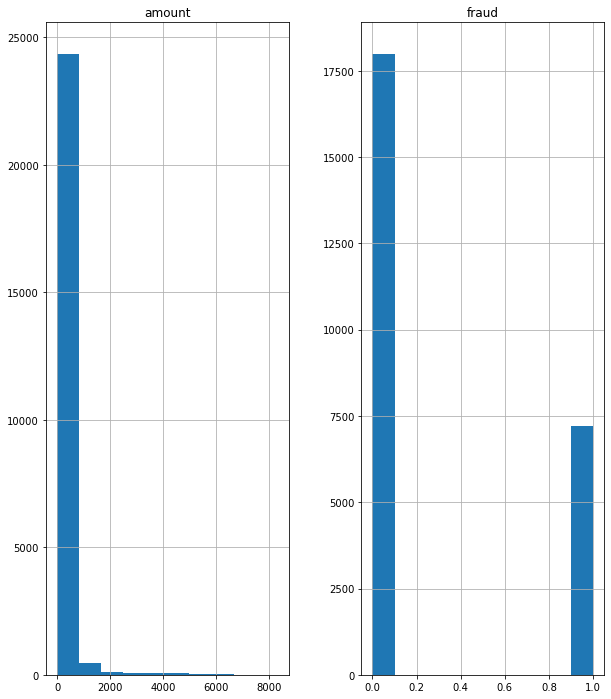

In [19]:
data.hist(figsize=(10,12))

##  Outliers detection

<AxesSubplot:>

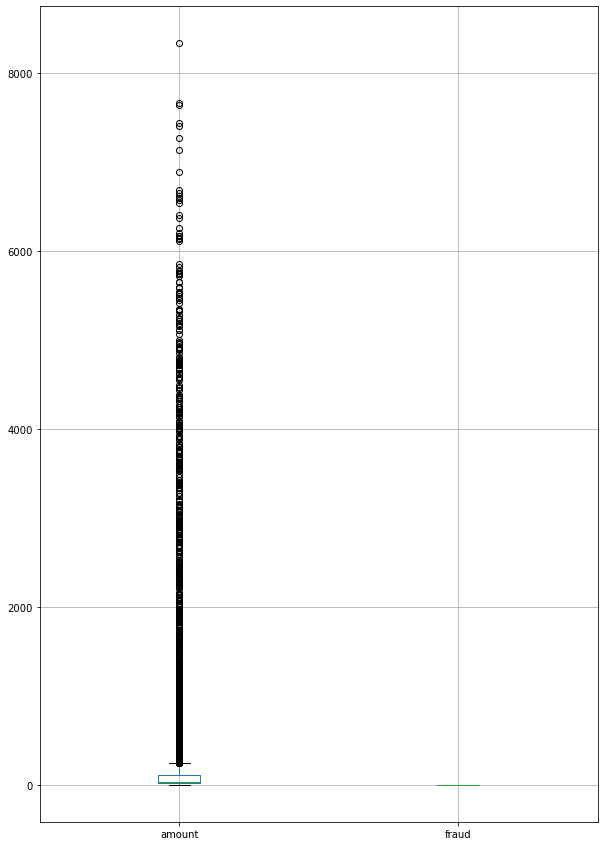

In [20]:
data.boxplot(figsize=(10,15))

<AxesSubplot:>

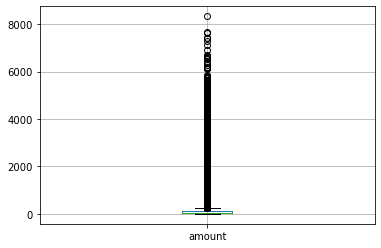

In [21]:
data.boxplot(column='amount')


In [22]:
data_n = data['amount']
target = data['fraud']
z = np.abs(stats.zscore(data_n)) 
print(z)

[0.31616547 0.86629822 0.26032901 ... 0.34266683 0.33691955 0.16029036]


In [23]:
threshold = 3
outliers = np.where(z > 3)
print(outliers)

(array([   80,   116,   118,   177,   190,   258,   276,   378,   389,
         447,   456,   509,   524,   551,   585,   721,   813,   857,
         931,   954,  1003,  1009,  1022,  1103,  1151,  1180,  1430,
        1452,  1454,  1475,  1517,  1551,  1579,  1623,  1628,  1678,
        1703,  1751,  1826,  1889,  1961,  2021,  2253,  2259,  2336,
        2460,  2628,  2774,  2838,  2918,  2924,  2925,  2937,  2949,
        2993,  3027,  3061,  3085,  3136,  3189,  3411,  3471,  3585,
        3622,  3642,  3679,  3806,  3838,  3853,  4011,  4068,  4082,
        4174,  4273,  4312,  4363,  4479,  4591,  4603,  4641,  4648,
        4804,  4825,  4925,  4989,  5033,  5083,  5093,  5179,  5183,
        5254,  5361,  5510,  5589,  5594,  5681,  5785,  5840,  5851,
        5873,  5906,  5923,  5944,  5954,  5976,  6017,  6239,  6343,
        6359,  6363,  6385,  6447,  6457,  6459,  6466,  6588,  6614,
        6619,  6688,  6819,  6833,  6929,  7071,  7110,  7117,  7124,
        7130,  7522

    - These outliers might be the one of the fraudulent transactions.so there shouldn't be any outliers removal in this dataset

In [24]:
data_n.shape 


(25200,)

## data visualization


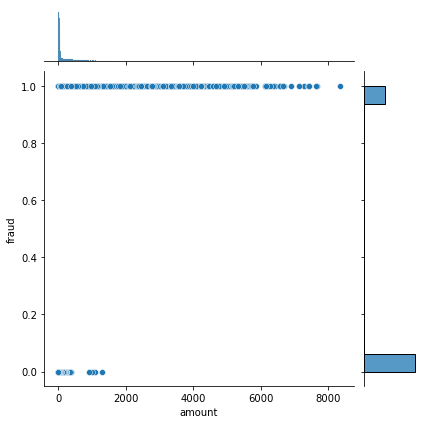

In [25]:
sns.jointplot(data['amount'],data['fraud'])


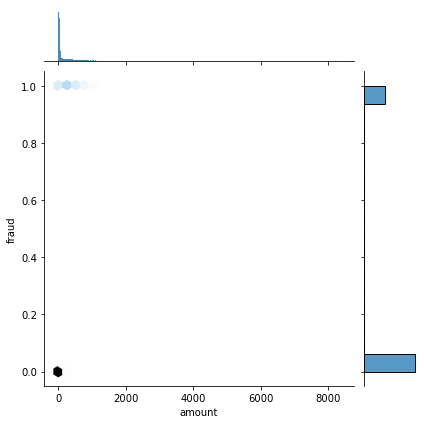

In [26]:
sns.jointplot(data['amount'],data['fraud'],kind='hex')


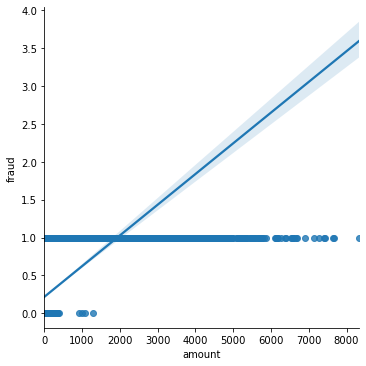

In [27]:
sns.lmplot(x='amount',y='fraud',data=data)
 

<AxesSubplot:xlabel='amount', ylabel='fraud'>

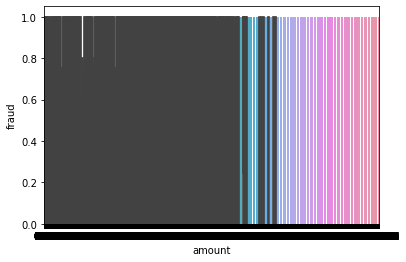

In [28]:
sns.barplot(x='amount',y='fraud',data=data)


## Train test split

In [36]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [31]:
entity_column = 'customer'
target_column= 'fraud'
datetime_columns = 'step'


In [32]:
if entity_column == '':
    data['entity_column']= data.index.tolist()
    entity_column = 'entity_column' 
    
if datetime_columns == '':
    data['datetime_columns']= data.index.tolist()    
    datetime_columns = 'datetime_columns'

numerical_columns = data._get_numeric_data().columns.values.tolist()
print(numerical_columns)


['amount', 'fraud']


0.9960853703703704
[[13193   307]
 [  243  5157]]


<AxesSubplot:>

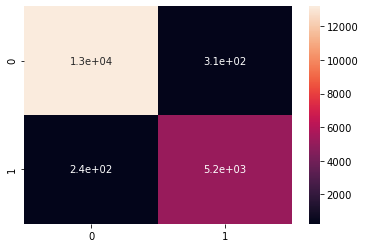

In [40]:
X = data.drop(columns=[entity_column,target_column,datetime_columns])
y = data[target_column]

# Label Encoding of Categorical Columns
categorical_names = {}
for feature in X.columns:
    X[feature] =  X[feature].fillna('') 
    le =  LabelEncoder()
    le.fit(X[feature])
    X[feature] = le.transform(X[feature])
    categorical_names[feature] = le.classes_
    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42,stratify=y)

rf = RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

predictions = rf.predict_proba(X_test)
predictions_class = rf.predict(X_test)


if data[target_column].nunique()> 2:
    rules_score = roc_auc_score(y_test, predictions[:,1], multi_class = 'ovo')
else:
    rules_score = roc_auc_score(y_test, predictions[:,1])

print(rules_score)

cf_matrix = confusion_matrix(y_test, predictions_class)
print(cf_matrix)

sns.heatmap(cf_matrix, annot=True)


# Now adding the feature to reduce the false positive rate

0.9965852880658437
[[13205   295]
 [  211  5189]]


<AxesSubplot:>

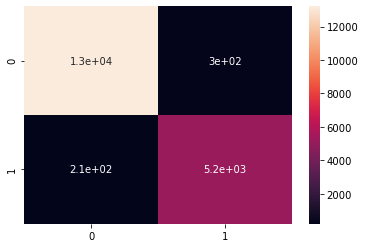

In [43]:
X = data.drop(columns=[entity_column,target_column]) # as we have added datetime_columns here 
y = data[target_column]

# Label Encoding of Categorical Columns
categorical_names = {}
for feature in X.columns:
    X[feature] =  X[feature].fillna('') 
    le =  LabelEncoder()
    le.fit(X[feature])
    X[feature] = le.transform(X[feature])
    categorical_names[feature] = le.classes_
    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42,stratify=y)

rf = RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

predictions = rf.predict_proba(X_test)
predictions_class = rf.predict(X_test)


if data[target_column].nunique()> 2:
    rules_score = roc_auc_score(y_test, predictions[:,1], multi_class = 'ovo')
else:
    rules_score = roc_auc_score(y_test, predictions[:,1])

print(rules_score)

cf_matrix = confusion_matrix(y_test, predictions_class)
print(cf_matrix)

sns.heatmap(cf_matrix, annot=True)


## As we observe adding the TimeFrame feature for the fraud detection we got somehow reduced misclassification errors which means false positive rate